# Boundary detection of composite transposable elements

## Notebook: Implement a baseline model

### Description:

Transposable elements are sequences in genomes that can change their position in the genome. Thus, they are also called “jumping genes”. They are able to affect the composition and size of genetic replicons. Our research interest in this project are composite transposable elements, which are flanked by two inverted repeats and transposable elements. Composite transposable elements are moving as one unit within a genome and are copying and inserting genes enclosed by itself. The following traits of composite transposable elements are making their detection challenging:

Sometimes terminal information such as repeats or transposable elements are missing, which would theoretically determine the boundaries of a composite transposable element.
Composite transposable elements are diverse in their genetic composition and size.
Composite transposable elements are usually associated with essential and indispensable genes, which are having a high gene frequency across genomes, but also with genes of lower essentiality, which leads to significant drop in the gene frequency landscape. We hypothesize that the genetic frequency landscape of a replicon will follow a particular pattern, which can be used as a marker for putative regions of composite transposable elements. Thus, we are representing here an approach to detect boundaries of composite transposable elements using the langugage of genome sequences consisting out protein families labels.

### Project Repo:

https://github.com/DMH-dutte/Boundary_detection_comTEs

Participants:

Nicolas Steen

Friedrich Kerchnawe

Wang Yiqing

Dustin Martin Hanke

### Course and Semester:

Transformers for Natural Language Processing and Beyond - Sommersemester 2022

# Implement a baseline model for NER-task

In [1]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def compute_metrics(pred, labels):

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)
    cm = confusion_matrix(all_labels, all_predictions)
    cm_n = confusion_matrix(all_labels, all_predictions, normalize="true")

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "cm":cm, "cm_normalized":cm_n}

def display_metrics(metrics):
    disp = ConfusionMatrixDisplay(metrics["cm_normalized"])
    disp.plot()
    plt.show()

    print(f'\nAccuracy:   {metrics["accuracy"]*100:.2f}%')
    print(f'precision:  {metrics["precision"]*100:.2f}%')
    print(f'recall:     {metrics["recall"]*100:.2f}%')
    print(f'f1:         {metrics["f1"]*100:.2f}%')
    print(f'\nConfusion matrix:\n{metrics["cm"]}')

In [3]:
path = "../data/" #"drive/MyDrive/TE_detection/data/processed_data/"
df = pd.read_pickle(r'../data/processed_data/training_set.pkl')
df_test = pd.read_pickle(r'../data/processed_data/test_set.pkl')
df = df[["token_ids", "attention_masks","labels"]]
df_test = df_test[["token_ids", "attention_masks","labels"]]
df.head()

,token_ids,attention_masks,labels
104,"[440, 4846, 4847, 4848, 4849, 4850, 4851, 4852...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
105,"[31, 2986, 2985, 2984, 2982, 2981, 2980, 2979,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
106,"[4984, 4985, 4986, 4987, 4988, 4989, 4990, 499...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
107,"[2925, 2924, 2923, 2922, 2921, 2920, 2918, 291...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
108,"[2877, 2876, 2875, 5004, 5005, 2874, 2873, 287...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Calculate the probability for each token to be in a transposable element

In [ ]:
results = {}

#for token_line, label_line in tqdm(zip(df["token_ids"], df["labels"])):
for idx, row in tqdm(df.iterrows()):
    for elem, label in zip(row.token_ids, row.labels):
        if elem not in results.keys():
            results[elem] = {}
            results[elem]['positives'] = 0
            results[elem]['count'] = 0
            results[elem]['p'] = 0
        results[elem]['count'] += 1
        if label == 1:
            results[elem]['positives'] += 1
        results[elem]['p'] = results[elem]['positives']/results[elem]['count']

209159it [00:52, 3992.93it/s]


In [ ]:
stats = pd.DataFrame({"index":list(results.keys()),
            "positives":[results[elem]['positives'] for elem in results.keys()],
            "count":[results[elem]['count'] for elem in results.keys()],
            "p":[results[elem]['p'] for elem in results.keys()]
            })
stats.describe()

,index,positives,count,p
count,32468.000000,32468.000000,32468.000000,32468.000000
mean,16271.040963,5.900363,966.300665,0.007705
std,9404.789746,115.082844,3616.420900,0.074606
min,0.000000,0.000000,1.000000,0.000000
25%,8126.750000,0.000000,9.000000,0.000000
50%,16256.500000,0.000000,44.000000,0.000000
75%,24404.250000,0.000000,643.000000,0.000000
max,32644.000000,6050.000000,547653.000000,1.000000


In [ ]:
# some tokens are always located inside of a TE
stats.sort_values(by=['p'], ascending=False).head(5)

,index,positives,count,p
10212,11143,74,74,1.0
29839,30112,24,24,1.0
22776,22791,1,1,1.0
21143,21366,7,7,1.0
31749,22691,1,1,1.0


In [ ]:
print(f"{sum(stats.p == 1)} ({sum(stats.p == 1)/stats.shape[0]*100:.2f}%) tokens are ALWAYS inside a TE!")
print(f"{sum(stats.p >= 0.5)} ({sum(stats.p >= 0.5)/stats.shape[0]*100:.2f}%) tokens are often inside a TE!")
print(f"{sum(stats.p == 0)/stats.shape[0]*100:.2f}% of tokens are NEVER inside a TE!")

55 (0.17%) tokens are ALWAYS inside a TE!
244 (0.75%) tokens are often inside a TE!
97.70% of tokens are NEVER inside a TE!


In [ ]:
predictions = [np.array([int(results[_id]['p'] >= 0.5) for _id in sample]) for sample in df["token_ids"]]
df["preds"] = predictions

all_labels = []
all_predictions = []

for idx, row in tqdm(df.iterrows()):
    all_labels.extend(row.labels[row.attention_masks==1])
    all_predictions.extend(row.preds[row.attention_masks==1])

209159it [00:22, 9456.80it/s]


In [ ]:
print(f"{sum(all_labels)/len(all_labels)*100:.2f}% of the data are true positives!")

0.62% of the data are true positives!


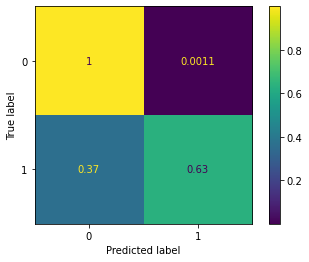


Accuracy:   99.66%
precision:  77.92%
recall:     63.42%
f1:         69.93%

Confusion matrix:
[[30600185    34439]
 [   70071   121502]]


In [ ]:
train_metrics = compute_metrics(all_predictions, all_labels)
display_metrics(train_metrics)

## Evaluation on Test-data

In [ ]:
my_train_tokens = results.keys()
unknown_tokens = []

for sample in df_test["token_ids"]:
    for _id in sample:
        if _id not in my_train_tokens:
            unknown_tokens.append(_id)
            results[_id] = {}
            results[_id]['positives'] = 0
            results[_id]['count'] = 0
            results[_id]['p'] = 0

print(f"{len(list(set(unknown_tokens)))} unique tokens are unknown!")
print(f"Total count: {len(unknown_tokens)}")

83 unique tokens are unknown!
Total count: 83


12668it [00:01, 10214.20it/s]


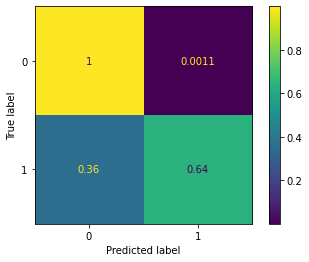


Accuracy:   99.66%
precision:  78.44%
recall:     63.95%
f1:         70.46%

Confusion matrix:
[[1854793    2108]
 [   4324    7670]]


In [ ]:
predictions = [np.array([int(results[_id]['p'] >= 0.5) for _id in sample]) for sample in df_test["token_ids"]]
df_test["preds"] = predictions

all_labels = []
all_predictions = []

for idx, row in tqdm(df_test.iterrows()):
    all_labels.extend(row.labels[row.attention_masks==1])
    all_predictions.extend(row.preds[row.attention_masks==1])

test_metrics = compute_metrics(all_predictions, all_labels)
display_metrics(test_metrics)

### Using a lower treshold

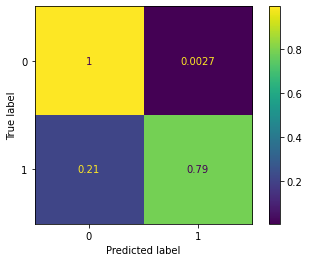


Accuracy:   99.59%
precision:  65.00%
recall:     78.96%
f1:         71.30%

Confusion matrix:
[[1851801    5100]
 [   2523    9471]]


In [ ]:
threshold = 0.3
predictions = [np.array([int(results[_id]['p'] >= threshold) for _id in sample]) for sample in df_test["token_ids"]]
df_test["preds"] = predictions
all_labels = []
all_predictions = []
for idx, row in df_test.iterrows():
    all_labels.extend(row.labels[row.attention_masks==1])
    all_predictions.extend(row.preds[row.attention_masks==1])

test_metrics_03 = compute_metrics(all_predictions, all_labels)
display_metrics(test_metrics_03)

## Bigram Probabilities

In [ ]:
results_bigrams = {}

for i in tqdm(range(0, df.shape[0])):
    for j in range(0, df.iloc[i].attention_masks.sum()-1):
        bigram = (df.iloc[i].token_ids[j], df.iloc[i].token_ids[j+1])
        if bigram not in results_bigrams.keys():
            results_bigrams[bigram] = {"total_count":0, (0,0):{}, (0,1):{}, (1,0):{}, (1,1):{}}
            for key in [(0,0), (0,1), (1,0), (1,1)]:
                results_bigrams[bigram][key]['count'] = 0
                results_bigrams[bigram][key]['p'] = 0
        results_bigrams[bigram]["total_count"] += 1
        key = (df.iloc[i].labels[j], df.iloc[i].labels[j+1])

        results_bigrams[bigram][key]["count"] += 1
        results_bigrams[bigram][key]['p'] = results_bigrams[bigram][key]["count"]/results_bigrams[bigram]['total_count']

import pickle
with open('../data/results_bigrams.pkl', 'wb') as handle:
    pickle.dump(results_bigrams, handle, protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 209159/209159 [2:01:44<00:00, 28.63it/s]


In [5]:
with open('../data/results_bigrams.pkl', 'rb') as handle:
    results_bigrams = pickle.load(handle)

In [6]:
stats = pd.DataFrame({
            "index":[(bigram, key) for bigram in results_bigrams.keys() for key in [(0,0), (0,1), (1,0), (1,1)]],
            "positives":[results_bigrams[bigram][key]["count"] for bigram in results_bigrams.keys() for key in [(0,0), (0,1), (1,0), (1,1)]],
            "p":[results_bigrams[bigram][key]["p"] for bigram in results_bigrams.keys() for key in [(0,0), (0,1), (1,0), (1,1)]]
            })
stats.describe()

,positives,p
count,849300.000000,849300.000000
mean,36.049733,0.251058
std,268.969968,0.432231
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.652174
max,12943.000000,1.000000


In [7]:
stats["bigram"] = stats["index"].apply(lambda x: x[0])
stats["key"] = stats["index"].apply(lambda x: x[1])
stats[stats.key!=(0,0)].sort_values(by=['p'], ascending=False).head(10)

,index,positives,p,bigram,key
424650,"((9319, 12041), (1, 0))",2,1.0,"(9319, 12041)","(1, 0)"
135322,"((6290, 13027), (1, 0))",1,1.0,"(6290, 13027)","(1, 0)"
760737,"((135, 2612), (0, 1))",3,1.0,"(135, 2612)","(0, 1)"
760742,"((10752, 16951), (1, 0))",3,1.0,"(10752, 16951)","(1, 0)"
454625,"((4597, 10752), (0, 1))",6,1.0,"(4597, 10752)","(0, 1)"
454630,"((2612, 13309), (1, 0))",3,1.0,"(2612, 13309)","(1, 0)"
135311,"((6287, 13026), (1, 1))",1,1.0,"(6287, 13026)","(1, 1)"
454641,"((16851, 2612), (0, 1))",6,1.0,"(16851, 2612)","(0, 1)"
135314,"((13026, 8479), (1, 0))",1,1.0,"(13026, 8479)","(1, 0)"
454646,"((10752, 11619), (1, 0))",6,1.0,"(10752, 11619)","(1, 0)"


In [64]:
predictions = []
all_bigram_keys = results_bigrams.keys()
unknown_bigrams = []
labels = [(1,1), (1,0), (0,1),(0,0)]

for idx in tqdm(range(df_test.shape[0])):
    predictions.append([0]*150)
    for i in range(df.iloc[idx].attention_masks.sum()-1):
        bigram = df_test.iloc[idx].token_ids[i], df_test.iloc[idx].token_ids[i+1]
        if bigram not in all_bigram_keys:
            unknown_bigrams.append(bigram)
            continue
        if results_bigrams[bigram][(1,0)]["p"] >= 0.5:
            predictions[idx][i] = 1
        if results_bigrams[bigram][(0,1)]["p"] >= 0.5:
            predictions[idx][i+1] = 1
        if results_bigrams[bigram][(1,1)]["p"] >= 0.5:
            predictions[idx][i] = 1
            predictions[idx][i+1] = 1
            

predictions = [np.array(pred) for pred in predictions]
df_test["preds"] = predictions

# save the dataframe
df_test.to_pickle('../data/df_test_bigrams.pkl')

100%|██████████| 12668/12668 [03:56<00:00, 53.61it/s]


In [ ]:
# load the dataframe
df_test = pd.read_pickle('../data/df_test_bigrams.pkl')

12668it [00:01, 9047.14it/s]


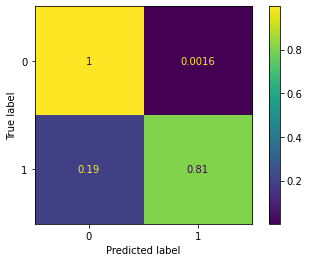


Accuracy:   99.72%
precision:  76.77%
recall:     81.10%
f1:         78.88%

Confusion matrix:
[[1853958    2943]
 [   2267    9727]]


In [65]:
all_labels = []
all_predictions = []
for idx, row in tqdm(df_test.iterrows()):
    all_labels.extend(row.labels[row.attention_masks==1])
    all_predictions.extend(row.preds[row.attention_masks==1])

metrics = compute_metrics(all_predictions, all_labels)
display_metrics(metrics)